# 1. Importing Libraries and dataset¶

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(101, 18)

In [4]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
#checking Missing Values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
#checking Duplicate Values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [9]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


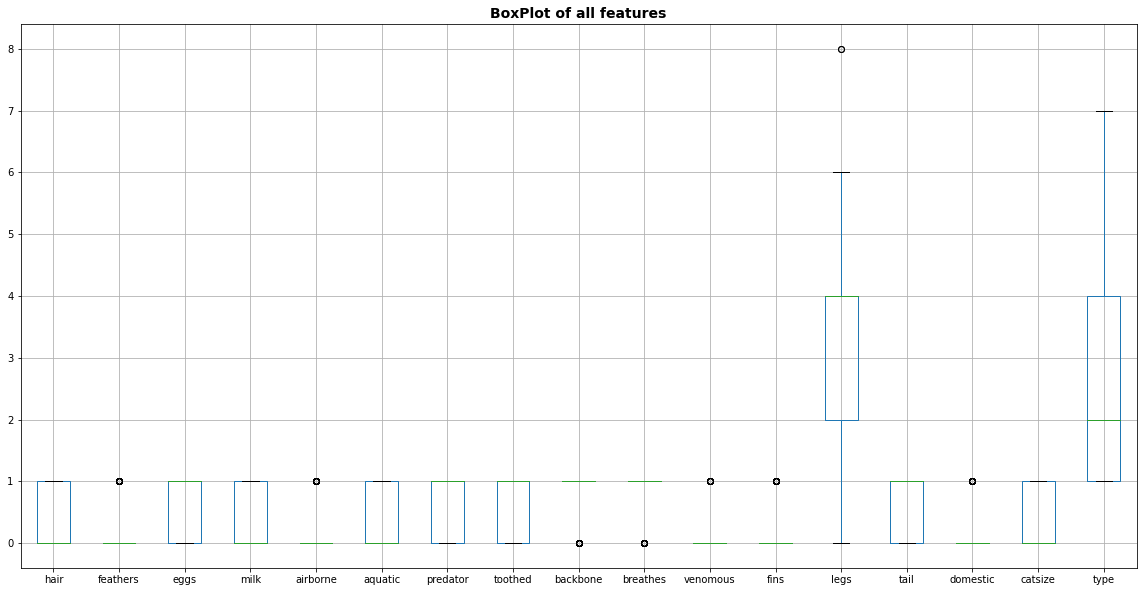

In [10]:
# Ploting boxplot for all features
plt.figure(figsize=(20, 10))
df.boxplot()
plt.title('BoxPlot of all features',fontweight='bold', fontsize=14)
plt.show()

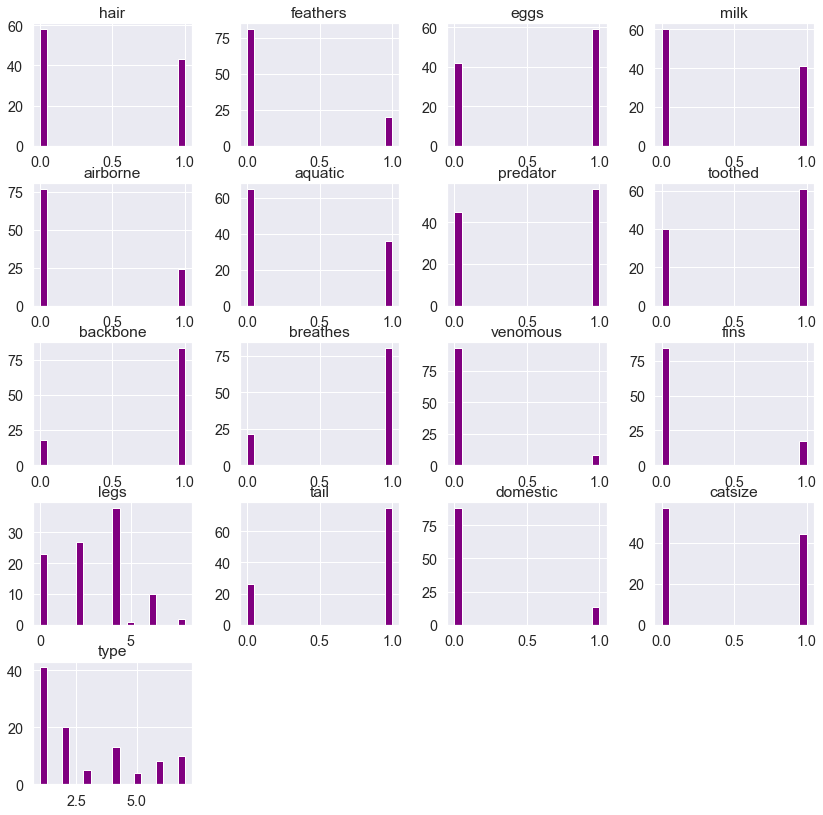

In [11]:
# Creating histograms for all the features
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = df.hist(bins= 20, color= 'purple')

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
X=df.iloc[:,1:17]
y=df.iloc[:,17]

In [14]:
X.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [15]:
y.head(2)

0    1
1    1
Name: type, dtype: int64

In [16]:
num_folds = 10
kfold = KFold(n_splits=10)

In [17]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, y, cv=kfold)
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.8, 0.8, 0.5, 0.6, 0.8])

In [18]:
print(results.mean())

0.78


## Grid Search for Algorithm Tuning

In [19]:
import numpy
from sklearn.model_selection import GridSearchCV

In [20]:
X=df.iloc[:,1:17]
y=df.iloc[:,17]

In [21]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [22]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


## Visualizing the results

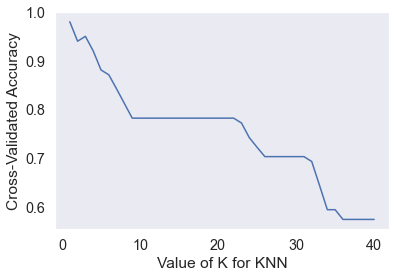

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
KNN = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=None)

In [29]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [30]:
train_pred=KNN.predict(X_train)

In [31]:
cm = confusion_matrix(y_train,train_pred)
cm

array([[28,  0,  0,  1,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  8]], dtype=int64)

In [32]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00        18
           3       0.00      0.00      0.00         4
           4       0.79      1.00      0.88        11
           5       0.80      1.00      0.89         4
           6       0.83      1.00      0.91         5
           7       1.00      0.89      0.94         9

    accuracy                           0.93        80
   macro avg       0.77      0.84      0.80        80
weighted avg       0.89      0.93      0.90        80



In [33]:
test_pred=KNN.predict(X_test)

In [34]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[11,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [35]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



Obervations:

We have implemented  KNN model to classify the animals into categories.

We used histogram to visualize.

Here we used Kfold, Cross Val Score, KNeighborsClassifier and Grid Search for Algorithm Tuning.

Classification report for Training model = 93%
Classification report for Testing model = 90%

we got 78% cross val score while using Kfold but Grid Search for algorithm tuning we obtained grid best score is 96%.

Interview Questions:
    
1. What are the key hyperparameters in KNN?

 The k-nearest neighbors (kNN) algorithm is a simple yet powerful machine learning technique used for classification and   regression tasks. One of the critical aspects of applying the kNN algorithm effectively is choosing the appropriate hyperparameters, which determine how the model will be structured during training. Selecting appropriate hyperparameters can significantly affect the model’s performance, improving its accuracy and ability to generalize to unseen data.

 Hyperparameters in the kNN algorithm refer to aspects such as the number of neighbors (k) considered during classification or regression, the distance metric used, and the weighting scheme applied to the data. One approach to selecting suitable hyperparameters involves using techniques like cross-validation, grid search, or random search. By iteratively testing different hyperparameter settings, practitioners can identify optimal values that result in the most accurate and robust models.

    

2. What distance metrics can be used in KNN?

 Choosing the right distance metric is crucial for K-Nearest Neighbors (KNN) algorithm used for classification and regression tasks. Distance metric determines how the algorithm measures proximity between data points, directly impacting model accuracy and performance i.e to find these nearest neighbors. The most common distance metrics include:

 Euclidean
 
 Manhattan
 
 Minkowski
 
 Chebyshev distances
 
 Cosine similarity
